In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Reshape, Activation, Flatten
from keras.layers import Input, BatchNormalization, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD

from utils import LossHistory, plotHistory, visualization_data, rotation_accuracy
from datasets.cifar import dataGenerator
from keras_lropt.callbacks import LRFinderAuto as LRFinder

Using TensorFlow backend.


# Parameters

In [2]:
num_class = 10
input_shape = (32, 32, 3)

batch_size = 32

data_augmentation = {
    'width_shift_range': 2,
    'height_shift_range': 2
}

# Dataset

In [3]:
trainGenerator = dataGenerator('train', batch_size=batch_size, reshape=False, **data_augmentation)
testGenerator = dataGenerator('test', batch_size=batch_size, reshape=False)

# Model

In [4]:
model = Sequential([
    Convolution2D(filters=128, kernel_size=(5, 5), padding='same', input_shape=input_shape),
    MaxPooling2D(),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Convolution2D(filters=256, kernel_size=(3, 3), padding='same'),
    MaxPooling2D(),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Flatten(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

# Training

In [6]:
model.compile(optimizer=Adam(lr=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

In [7]:
history = LossHistory(metrics=('loss', 'acc'))

In [8]:
hist = model.fit_generator(trainGenerator,
                                    steps_per_epoch=50000 // batch_size,
                                    epochs=10,
                                    validation_data=testGenerator,
                                    validation_steps=10000 // batch_size,
                                    verbose=2,
                                    callbacks=[history])

Epoch 1/10
 - 27s - loss: 1.6133 - acc: 0.4499 - val_loss: 1.2753 - val_acc: 0.5388
Epoch 2/10
 - 25s - loss: 1.2004 - acc: 0.5820 - val_loss: 1.1976 - val_acc: 0.5979
Epoch 3/10
 - 25s - loss: 1.0545 - acc: 0.6352 - val_loss: 1.1324 - val_acc: 0.6023
Epoch 4/10
 - 25s - loss: 0.9684 - acc: 0.6645 - val_loss: 1.0007 - val_acc: 0.6578
Epoch 5/10
 - 25s - loss: 0.8965 - acc: 0.6889 - val_loss: 0.8560 - val_acc: 0.7072
Epoch 6/10
 - 25s - loss: 0.8389 - acc: 0.7101 - val_loss: 0.9026 - val_acc: 0.6861
Epoch 7/10
 - 25s - loss: 0.7979 - acc: 0.7233 - val_loss: 0.9417 - val_acc: 0.6847
Epoch 8/10
 - 25s - loss: 0.7593 - acc: 0.7379 - val_loss: 0.8513 - val_acc: 0.7085
Epoch 9/10
 - 25s - loss: 0.7293 - acc: 0.7478 - val_loss: 0.7628 - val_acc: 0.7444
Epoch 10/10
 - 25s - loss: 0.6963 - acc: 0.7573 - val_loss: 0.7703 - val_acc: 0.7368


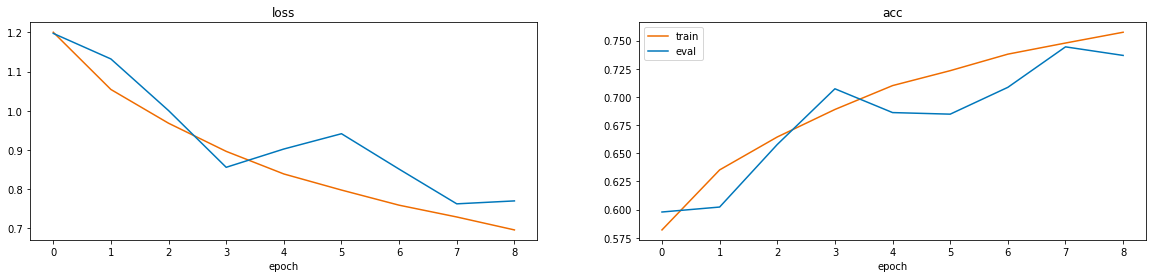

In [9]:
plotHistory(history.metrics)

# Evaluation on augmented data

## Accuracy
Test accuracy for different rotations on test data

Test acc [0.0°]:	0.737
Test acc [20.0°]:	0.681
Test acc [40.0°]:	0.582
Test acc [60.0°]:	0.497
Test acc [80.0°]:	0.44
Test acc [100.0°]:	0.408
Test acc [120.0°]:	0.367
Test acc [140.0°]:	0.349
Test acc [160.0°]:	0.34
Test acc [180.0°]:	0.328


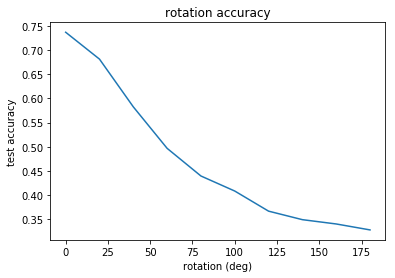

In [10]:
rotation_accuracy(model, dataGenerator, n_points=10, batch_size=batch_size)

## Visualization

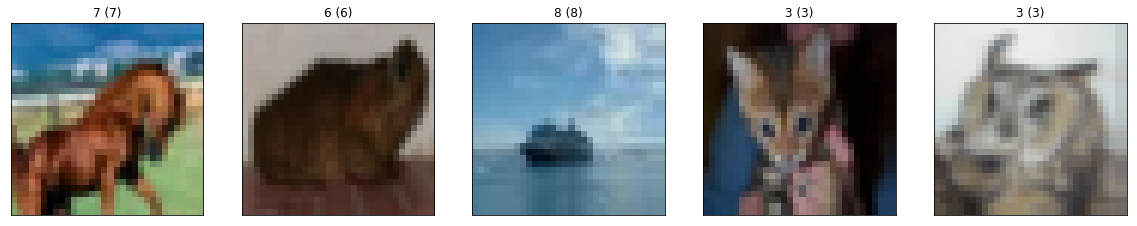

In [11]:
n_image=5

# Select data
testGenerator = dataGenerator('test', batch_size=n_image, reshape=False, **data_augmentation)
images, labels = next(testGenerator)

# Run inference
predictions = model.predict(images)

# Post-process data
labels = np.argmax(labels, axis=1)
predictions = np.argmax(predictions, axis=1)

visualization_data(images, labels, predictions)